# EDA of IPL Auction 2022

In this project we are going to perform Exploratory Data Analysis (EDA) on the dataset of IPL Auction 2022. This dataset is downloaded from Kaggle. We will try to explore this data as much as possible and plot the results for visualization. We are going to use NumPy, Pandas, Matplotlib, Seaborn and some other Python libraries in this analysis.


## Downloading the Dataset

First step is to download the dataset.
- Install the Python library 'opendatasets'.
- Copy the link of csv file.
- download the file using following commands.

**NOTE** - while downloading the file you will be asked to enter the ID and Key, which, you need to get from your Kaggle profile. 

In [12]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [13]:
dataset_url = 'https://www.kaggle.com/datasets/shivavashishtha/2022-ipl-auction-dataset' 

In [14]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./2022-ipl-auction-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [15]:
data_dir = './2022-ipl-auction-dataset'

In [16]:
import os
os.listdir(data_dir)

['ipl_2022_dataset.csv']

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

Now we will perform data preparation and cleaning by removing unwanted rows and columns.



Using **Pandas** let's read the dataframe and have a closer look.

[**Pandas**](https://pandas.pydata.org/) is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more.

In [17]:
import pandas as pd

In [18]:
IPL_Auction_raw_df = pd.read_csv('./2022-ipl-auction-dataset/ipl_2022_dataset.csv')

In [19]:
IPL_Auction_raw_df

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


So, the data has 633 rows and 8 columns. Now let's look at the info.

In [20]:
IPL_Auction_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


Column 'Unnamed: 0' is integer type, but from previous table its clear that its just the index of the rows. columns 4 and 5 have float data type and rest are the object data type.

In [21]:
IPL_Auction_raw_df.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,237.000000,237.000000
mean,316.000000,3.695781,480.451477
std,182.875641,4.238092,550.951945
min,0.000000,0.200000,26.000000
25%,158.000000,0.400000,52.000000
50%,316.000000,1.900000,247.000000
75%,474.000000,6.500000,845.000000
max,632.000000,17.000000,2210.000000


In [22]:
IPL_Auction_raw_df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

We don't need columns 'Unnamed: 0' and 'Cost IN $ (000)', so removing them.

In [23]:
IPL_Auction_2022 = IPL_Auction_raw_df[[ 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
        '2021 Squad', 'Team']]

In [24]:
IPL_Auction_2022

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,KKR,Gujarat Titans
...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,Unsold


Most of the players went unsold. So, let's create a new dataframe of sold players only.

In [25]:
IPL_Auction_2022_sold = IPL_Auction_2022[IPL_Auction_2022.Team != 'Unsold'].copy()

In [26]:
IPL_Auction_2022_sold

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,KKR,Gujarat Titans
...,...,...,...,...,...,...
232,Priyam Garg,20 Lakh,BATTER,0.2,SRH,Sunrisers Hyderabad
233,R Samarth,20 Lakh,BATTER,0.2,NaN,Sunrisers Hyderabad
234,Jagadeesha Suchith,20 Lakh,BOWLER,0.2,SRH,Sunrisers Hyderabad
235,Shashank Singh,20 Lakh,ALL-ROUNDER,0.2,NaN,Sunrisers Hyderabad


## Exploratory Analysis and Visualization

In this section we will analyse the data and plot the graphs.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

- [**Matplotlib**](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- [**Seaborn**](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

[**NumPy**](https://numpy.org/) is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

In [28]:
import numpy as np

Let's find out what percentage of players went unsold using Pie chart.

In [29]:
Teams = IPL_Auction_2022.groupby('Team')['Player'].count()

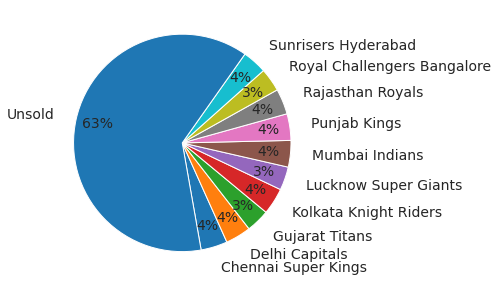

In [30]:
plt.pie(Teams, labels = Teams.index ,rotatelabels=False,labeldistance=1.2, startangle=-80, autopct='%1.f%%',pctdistance=0.8);


Now we know that around 63% players went unsold. So, now let's find out how many players each team purchased in the auction.

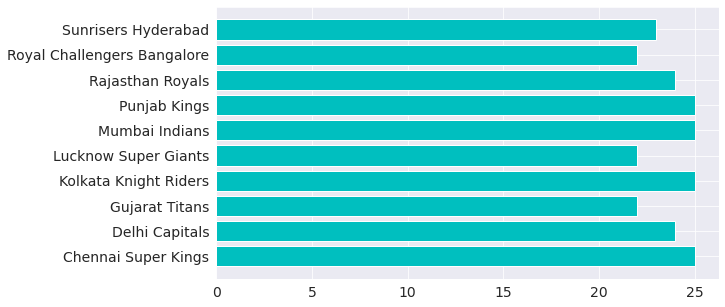

In [31]:
player_count = IPL_Auction_2022_sold.groupby('Team')['Player'].count()
plt.barh(player_count.index, player_count, color='c');

It seems that each team purchased between 22 to 25 players. Punjab Kings, Mumbai Indians, Kolkata Knight Riders and Chennai Super Kings have purchased 25 players each.

Let's find out how much each team spent from their bucket.

In [32]:
total_cost = IPL_Auction_2022_sold.groupby('Team').sum().sort_values('COST IN ₹ (CR.)', ascending = False)
total_cost

,COST IN ₹ (CR.)
Team,
Mumbai Indians,89.90
Sunrisers Hyderabad,89.90
Gujarat Titans,89.65
Lucknow Super Giants,89.40
Rajasthan Royals,89.05
Royal Challengers Bangalore,88.45
Chennai Super Kings,87.05
Delhi Capitals,86.40
Punjab Kings,84.55


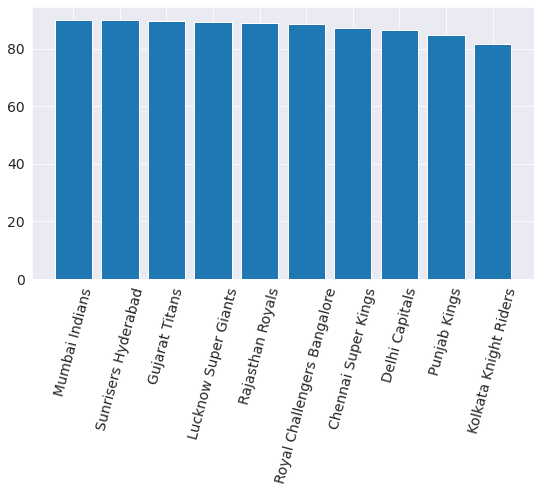

In [33]:
plt.bar(total_cost.index,total_cost['COST IN ₹ (CR.)']);
plt.xticks(rotation=75);

Mumbai Indians has spent most 89.9 CR. and Kolkata Knight Riders has spent least 81.55 CR. But from the bar graph we can see that the difference is not much, infact it's less than 9 CR.

Now let's explore the percentage of type of players sold in this auction

In [34]:
Player_type = IPL_Auction_2022_sold.groupby('TYPE')['Player'].count()

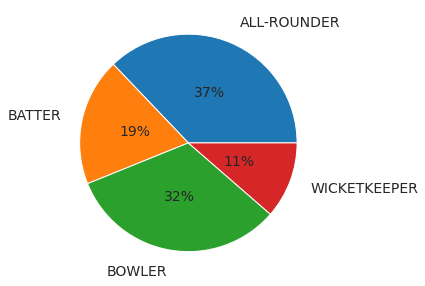

In [35]:
plt.pie(Player_type, labels = Player_type.index ,rotatelabels=False,labeldistance=1.2,  autopct='%1.f%%',pctdistance=0.5);

From the above Pie chart we can observe that All-Rounders and Bowlers were most in the demand.

Let's use histogram to see the frequency of players sold for different prize ranges.

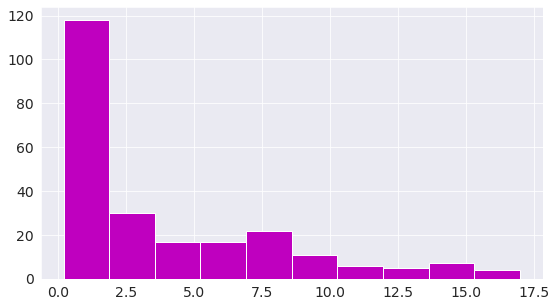

In [36]:
plt.hist(IPL_Auction_2022_sold['COST IN ₹ (CR.)'], color = 'm');

From the above histogram we observed that around 120 players bagged the prize between 0.2 to 2 Cr. Now let's have a closer look at this in below graph.

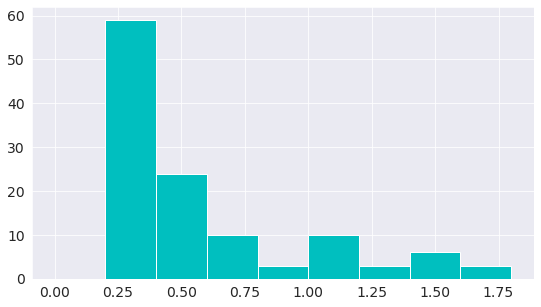

In [37]:
plt.hist(IPL_Auction_2022_sold['COST IN ₹ (CR.)'], color = 'c', bins=np.arange(0, 2, 0.2));

From the above histogram we can observe that out of those 120 players around 60 players bagged the prize between 0.2 to .4 Cr. And around 22 players went for 0.4 to 0.6 Cr. and so on. Now let's have a closer look on the players above 10 Cr.

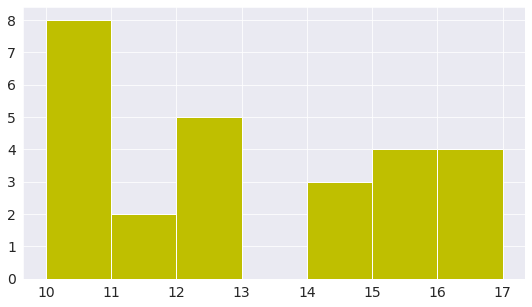

In [38]:
plt.hist(IPL_Auction_2022_sold['COST IN ₹ (CR.)'], color = 'y', bins=np.arange(10, 18, 1));

From the above histogram now its more clear about the numbers of highest paid players. We can see that almost 4 players were sold for 15-16 Cr. and 4 players for 16-17 Cr. and so on.

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

In this section we are going to dig deeper the dataset and ask some interesting questions and answer them by performing some manipulations. We may need to use some Python libraries, such as Pandas/Numpy/Matplotlib etc.



#### Q1: Who are the 15 Highest paid Cricketers? How many players each team have out of these 15 players? What are the types of these players?

In [39]:
highest_paid = IPL_Auction_2022_sold.sort_values( 'COST IN ₹ (CR.)',ascending = False).head(15)
highest_paid

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team
121,KL Rahul,Draft Pick,WICKETKEEPER,17.00,PBKS,Lucknow Super Giants
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,CSK,Chennai Super Kings
143,Rohit Sharma,Retained,BATTER,16.00,MI,Mumbai Indians
47,Rishabh Pant,Retained,WICKETKEEPER,16.00,DC,Delhi Capitals
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,MI,Mumbai Indians
0,Rashid Khan,Draft Pick,BOWLER,15.00,SRH,Gujarat Titans
168,Virat Kohli,Retained,BATTER,15.00,RCB,Royal Challengers Bangalore
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,MI,Gujarat Titans
190,Sanju Samson,Retained,WICKETKEEPER,14.00,RR,Rajasthan Royals
214,Kane Williamson,Retained,BATTER,14.00,SRH,Sunrisers Hyderabad


Above table shows the 15 Highest paid players.

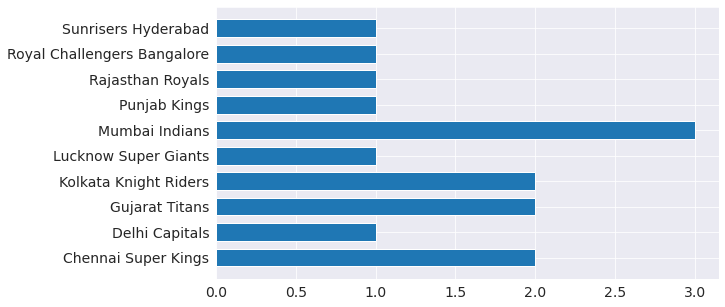

In [40]:
hp_count = highest_paid.groupby('Team')['Player'].count()
plt.barh(hp_count.index, hp_count, height=0.7);

Above bar graph shows the number of players each team has out of these 15 players. So, all the teams have atleast one player from this top 15 players.

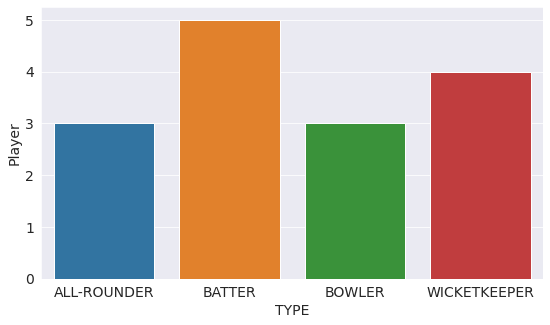

In [41]:
hp_type_count = highest_paid.groupby('TYPE')['Player'].count()
#plt.bar(hp_type_count.index, hp_type_count);
sns.barplot(x=hp_type_count.index, y=hp_type_count);

Above graph shows type of those top players. 5 players are the pure Batters.

#### Q2: Show the frequency of players based on their base price.

In [42]:
base_price = IPL_Auction_2022_sold.groupby('Base Price')['Player'].count()

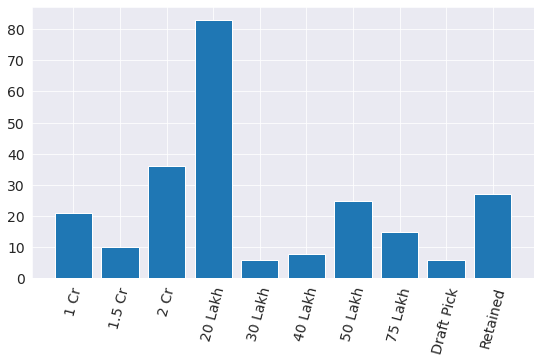

In [43]:
plt.bar(base_price.index, base_price);
plt.xticks(rotation=75);

Of all sold players more than 80 players had their base price as 20 Lakh, more than 25 players were retained and around 5-6 players were draft picked.

#### Q3: Find the top 10 most valued players (players who received highest multiple of their base price)

In the existing dataset the 'Base Price' has the object data type, therefore it can not be computed and compared with their cost. So, we first need to create a new column where the base price will be in (Cr.) and data type will be float. Therefore, we need to define a function to convert these into Cr. rupees. The function is defined below. Also, the 'Draft Pick' and 'Retained' types will be set as 'none' in new column as they cant be compared.

In [44]:
def to_rupees(base_price):
    base_price_new = []
    for i in base_price:
        if i == '20 Lakh':
            base_price_new.append(0.2)
        elif i == '30 Lakh':
            base_price_new.append(0.3)
        elif i == '40 Lakh':
            base_price_new.append(0.4)
        elif i == '50 Lakh':
            base_price_new.append(0.5)
        elif i == '75 Lakh':
            base_price_new.append(0.75)
        elif i == '1 Cr':
            base_price_new.append(1)
        elif i == '1.5 Cr':
            base_price_new.append(1.5)
        elif i == '2 Cr':
            base_price_new.append(2)
        else:
            base_price_new.append(None)
    return base_price_new

In [45]:
Base_price_inCr = to_rupees(IPL_Auction_2022_sold['Base Price'])

In [46]:
len(Base_price_inCr)

237

In [47]:
IPL_Auction_2022_sold['Base Price (in Cr.)'] = pd.Series(Base_price_inCr)

In [48]:
IPL_Auction_2022_sold

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team,Base Price (in Cr.)
0,Rashid Khan,Draft Pick,BOWLER,15.0,SRH,Gujarat Titans,NaN
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,MI,Gujarat Titans,NaN
2,Lockie Ferguson,2 Cr,BOWLER,10.0,KKR,Gujarat Titans,2.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,RR,Gujarat Titans,0.4
4,Shubman Gill,Draft Pick,BATTER,8.0,KKR,Gujarat Titans,NaN
...,...,...,...,...,...,...,...
232,Priyam Garg,20 Lakh,BATTER,0.2,SRH,Sunrisers Hyderabad,0.2
233,R Samarth,20 Lakh,BATTER,0.2,NaN,Sunrisers Hyderabad,0.2
234,Jagadeesha Suchith,20 Lakh,BOWLER,0.2,SRH,Sunrisers Hyderabad,0.2
235,Shashank Singh,20 Lakh,ALL-ROUNDER,0.2,NaN,Sunrisers Hyderabad,0.2


Here, in the above table a new column named 'Base Price (in Cr.)' has been added. Now it can be compared with the Cost of players. See below.

In [49]:
IPL_Auction_2022_sold['value'] = (IPL_Auction_2022_sold['COST IN ₹ (CR.)']/IPL_Auction_2022_sold['Base Price (in Cr.)'])

In [50]:
most_valued = IPL_Auction_2022_sold[['Player','value','Base Price','COST IN ₹ (CR.)']].sort_values('value', ascending = False).head(10)
most_valued

,Player,value,Base Price,COST IN ₹ (CR.)
122,Avesh Khan,50.000,20 Lakh,10.00
219,Abhishek Sharma,32.500,20 Lakh,6.50
99,Shahrukh Khan,22.500,40 Lakh,9.00
3,Rahul Tewatia,22.500,40 Lakh,9.00
217,Rahul Tripathi,21.250,40 Lakh,8.50
146,Tim David,20.625,40 Lakh,8.25
225,Kartik Tyagi,20.000,20 Lakh,4.00
105,Harpreet Brar,19.000,20 Lakh,3.80
77,Shivam Mavi,18.125,40 Lakh,7.25
176,Anuj Rawat,17.000,20 Lakh,3.40


Here, a subset of original date frame named 'most_valued' has been created , which also include a new column 'value', which shows what multiple of base price the cost the player is. 

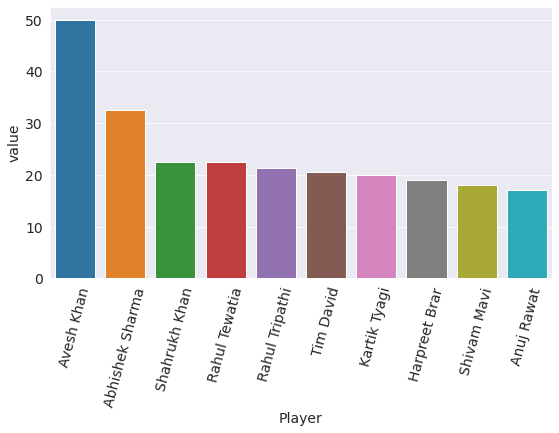

In [51]:
sns.barplot(x='Player', y='value', data=most_valued);
plt.xticks(rotation=75);

From the above graph and table we can observe that Avesh Khan received the amount 50 times of his base price, which is really huge jump, also the second player Abhishek Sharma received 32.5 times of his base price and remaining 8 players went for around 20 times their base price.

#### Q4: Who are the top 10 Wicket Keepers of this auction? compare their cost by showing in a bar graph.

In [52]:
wk = IPL_Auction_2022_sold[IPL_Auction_2022_sold.TYPE=='WICKETKEEPER'].sort_values('COST IN ₹ (CR.)', ascending = False).head(10)
wk

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team,Base Price (in Cr.),value
121,KL Rahul,Draft Pick,WICKETKEEPER,17.00,PBKS,Lucknow Super Giants,NaN,NaN
47,Rishabh Pant,Retained,WICKETKEEPER,16.00,DC,Delhi Capitals,NaN,NaN
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,MI,Mumbai Indians,2.0,7.625000
190,Sanju Samson,Retained,WICKETKEEPER,14.00,RR,Rajasthan Royals,NaN,NaN
24,MS Dhoni,Retained,WICKETKEEPER,12.00,CSK,Chennai Super Kings,NaN,NaN
215,Nicholas Pooran,1.5 Cr,WICKETKEEPER,10.75,PBKS,Sunrisers Hyderabad,1.5,7.166667
191,Jos Buttler,Retained,WICKETKEEPER,10.00,RR,Rajasthan Royals,NaN,NaN
26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,CSK,Chennai Super Kings,2.0,3.375000
127,Quinton De Kock,2 Cr,WICKETKEEPER,6.75,MI,Lucknow Super Giants,2.0,3.375000
101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,SRH,Punjab Kings,1.5,4.500000


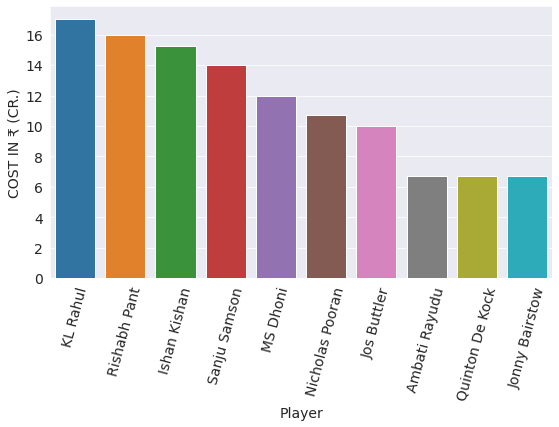

In [53]:
sns.barplot(x='Player', y='COST IN ₹ (CR.)', data=wk);
plt.xticks(rotation=75);

The above graph shows the top 10 wicket keepers and also compares their price. KL Rahul who is in the first place has price value almost 2.5 times the wicket keeper in the 8th to 10th places.

#### Q5: Show all the retained players and also show which team spent what amount to retain their player.

In [54]:
rt = IPL_Auction_2022_sold[IPL_Auction_2022_sold['Base Price'] == 'Retained']
rt

,Player,Base Price,TYPE,COST IN ₹ (CR.),2021 Squad,Team,Base Price (in Cr.),value
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,CSK,Chennai Super Kings,NaN,NaN
24,MS Dhoni,Retained,WICKETKEEPER,12.0,CSK,Chennai Super Kings,NaN,NaN
25,Moeen Ali,Retained,ALL-ROUNDER,8.0,CSK,Chennai Super Kings,NaN,NaN
27,Ruturaj Gaikwad,Retained,BATTER,6.0,CSK,Chennai Super Kings,NaN,NaN
47,Rishabh Pant,Retained,WICKETKEEPER,16.0,DC,Delhi Capitals,NaN,NaN
49,Axar Patel,Retained,ALL-ROUNDER,9.0,DC,Delhi Capitals,NaN,NaN
50,Prithvi Shaw,Retained,BATTER,7.5,DC,Delhi Capitals,NaN,NaN
52,Anrich Nortje,Retained,BOWLER,6.5,DC,Delhi Capitals,NaN,NaN
72,Andre Russell,Retained,ALL-ROUNDER,12.0,KKR,Kolkata Knight Riders,NaN,NaN
74,Venkatesh Iyer,Retained,ALL-ROUNDER,8.0,KKR,Kolkata Knight Riders,NaN,NaN


The above table shows the names of all the retained players.

In [55]:
rt_list = rt.groupby('Team').sum().sort_values('COST IN ₹ (CR.)', ascending = False)
rt_list

,COST IN ₹ (CR.),Base Price (in Cr.),value
Team,,,
Chennai Super Kings,42.0,0.0,0.0
Mumbai Indians,42.0,0.0,0.0
Delhi Capitals,39.0,0.0,0.0
Kolkata Knight Riders,34.0,0.0,0.0
Royal Challengers Bangalore,33.0,0.0,0.0
Rajasthan Royals,28.0,0.0,0.0
Sunrisers Hyderabad,22.0,0.0,0.0
Punjab Kings,16.0,0.0,0.0


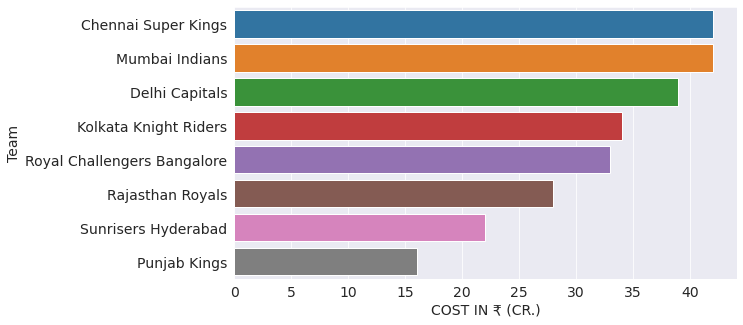

In [56]:
sns.barplot(  x=rt_list['COST IN ₹ (CR.)'], y= rt_list.index);

The above table and graph shows how much each team spent to retain their players. Chennai Super Kings and Mumbai Indians spent most (42 Cr.) and Punjab Kings spent the least (16 Cr.) to retain their players.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

From this analysis we got to know about the highest paid cricketers, number of players purchased by each team, percentage of sold/unsold player, percentage of batter, all-rounder etc., money spent by each team, most valued players, retained players and their prices etc.
We asked questions such as' who are the top 10 wicket keepers/ most valued players?', 'frequency according to the base price' etc.
While answering the questions we needed to use library functions such as Pandas/NumPy/Matplotlib/Seaborn etc. Also, we created our own function, performed looping and if else statements.

## References and Future Work

As a future work we can find out and plot graphs about top 10 batters/bowlers etc., another data set from internet containing the country names of these players can be downloaded and merged to do some more analysis, average money spent by each team on retained players/ draft picks/bowlers etc. can be found out. Likewise, some other analyses can be done.